In [1]:
import pandas as pd
import numpy as np
from utilities import *

In [2]:
import pickle

payoffs = load_data('../model/data/processed/50yr_all.pickle')

with open('../output/processed/best_policies.pickle', "rb") as f:
    best_policies = pickle.load(f)
    best_policies = list(set(best_policies.values()))

payoffs = payoffs[payoffs.index.isin(best_policies)]

# normalize payoffs
normalized_payoffs = normalize(payoffs)

In [36]:
min(payoffs.rank(ascending = False).sum(axis=1))

21.0

In [100]:
del list

In [101]:
import itertools 


#all_combinations = [p for p in itertools.product(x )]
all_combinations = list(itertools.permutations([1, 2,3]))

In [174]:
all_combinations = list(itertools.permutations([1, 2,3,4]))

In [76]:
def func(test):
    return np.where(test == test.min(axis=1))

In [182]:
%%time
test = itertools.product(all_combinations, repeat =4)

Wall time: 0 ns


In [183]:
%%time
a=[]
for item in test:
    b = np.array((item)).sum(axis=0)
    a.append(list(np.where(b==b.min())[0]))
    #a.append(np.argmin(np.array((item)).sum(axis=0), axis=0))

Wall time: 4.54 s


In [188]:
len([j for i in a for j in i])

402528

<AxesSubplot:ylabel='Count'>

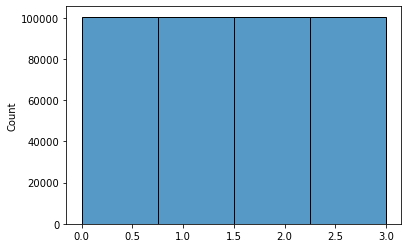

In [177]:
sns.histplot([j for i in a for j in i], bins =4)

In [141]:
np.where(a[1]==a[1].min())

AttributeError: 'list' object has no attribute 'min'

<AxesSubplot:ylabel='Count'>

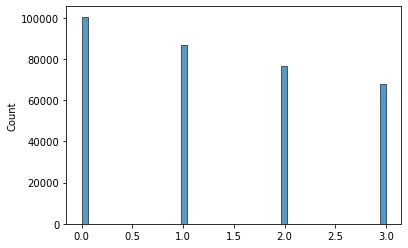

In [116]:
import seaborn as sns
sns.histplot(a)

In [12]:
%%time
test = np.argmin(np.array(list(itertools.product(all_combinations, repeat =7))).sum(axis=1), axis=1)
#len(np.argmin(test, axis=1))

MemoryError: 

In [87]:
np.array(list(itertools.product(all_combinations, repeat =7)))[0]

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

In [72]:
test

array([[2, 4],
       [3, 3],
       [3, 3],
       [4, 2]])

In [43]:
a = [[1,2],[1,2]]
np.array(list(itertools.product(*a)))

array([[1, 1],
       [1, 2],
       [2, 1],
       [2, 2]])

In [45]:
np.array(np.meshgrid(a))

array([[1, 2, 1, 2]])

In [37]:
array = np.zeros((2, 2))
array

array([[0., 0.],
       [0., 0.]])

In [34]:
x= [1,2,3]
np.array(np.meshgrid(x,x))

array([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]]])

In [14]:
array = np.zeros((payoffs.shape[0], payoffs.shape[1]))
array

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [199]:
%%time

outcome = {}
for actor in actors:
    outcome[actor] = {}
    ranks = payoffs.copy()
    for i in payoffs.columns:
        ranks[i] = payoffs[i].rank()

    for i in range(len(all_combinations)):
        ranks[actor] = list(all_combinations[i])

        ranks['combined'] = ranks[actors].sum(axis=1)
        
        outcome[actor][i] = ranks.index[ranks['combined'] == max(ranks['combined'])][0]

Wall time: 42.5 s


In [208]:
Counter(outcome['hydropower_revenue'].values())

Counter({'best_rec': 1008,
         'best_hydro': 1182,
         'best_env': 462,
         'best_comp': 1182,
         'best_ch': 1182,
         'best_app': 24})

In [200]:
Counter(outcome['atomic_power_plant_discharge'].values())

Counter({'best_comp': 3672, 'best_hydro': 264, 'best_ch': 1104})

In [201]:
Counter(outcome['baltimore_discharge'].values())

Counter({'best_hydro': 2520, 'best_comp': 2520})

In [202]:
Counter(outcome['chester_discharge'].values())

Counter({'best_hydro': 960, 'best_comp': 3120, 'best_ch': 960})

In [209]:
Counter(outcome['recreation'].values())

Counter({'best_hydro': 2908,
         'best_rec': 892,
         'best_comp': 776,
         'best_env': 52,
         'best_ch': 412})

In [204]:
Counter(outcome['flood_duration'].values())

Counter({'best_rec': 508,
         'best_hydro': 828,
         'best_env': 508,
         'best_comp': 1108,
         'best_ch': 2088})

In [196]:
ranks['hydropower_revenue'] = list(all_combinations[1179])
ranks['combined'] = ranks[actors].sum(axis=1)
ranks.index[ranks['combined'] == max(ranks['combined'])]

Index(['best_comp'], dtype='object')

In [198]:
from collections import Counter
Counter(outcome.values())

Counter({'best_rec': 1008,
         'best_hydro': 1182,
         'best_env': 462,
         'best_comp': 1182,
         'best_ch': 1182,
         'best_app': 24})